## <center> Packages <center>

In [1]:
from tests_impl import *
from tqdm.auto import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import non_partial_monte_carlo
import partial_monte_carlo
import torch
import numpy as np

# import warnings
# warnings.filterwarnings("ignore")

## <center> 1.1. Relevance Test [Done] <center>

In [18]:
# see test_impl: unconditional_relevance

## <center> 1.2 Simulation and sanity check [Need to monte-carlo model] <center>

In [21]:
sets_of_f2_indices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [0, 1, 4],
    [2, 3],
]

unconditional_results = non_partial_monte_carlo.monte_carlo_unconditional_relevance_prodecure(
    T=200,
    beta=0.98, 
    gamma=1.5,
    sets_of_f2_indices=sets_of_f2_indices,
    B=1000,
    num_alphas=5000,
    n_jobs=-1,
)

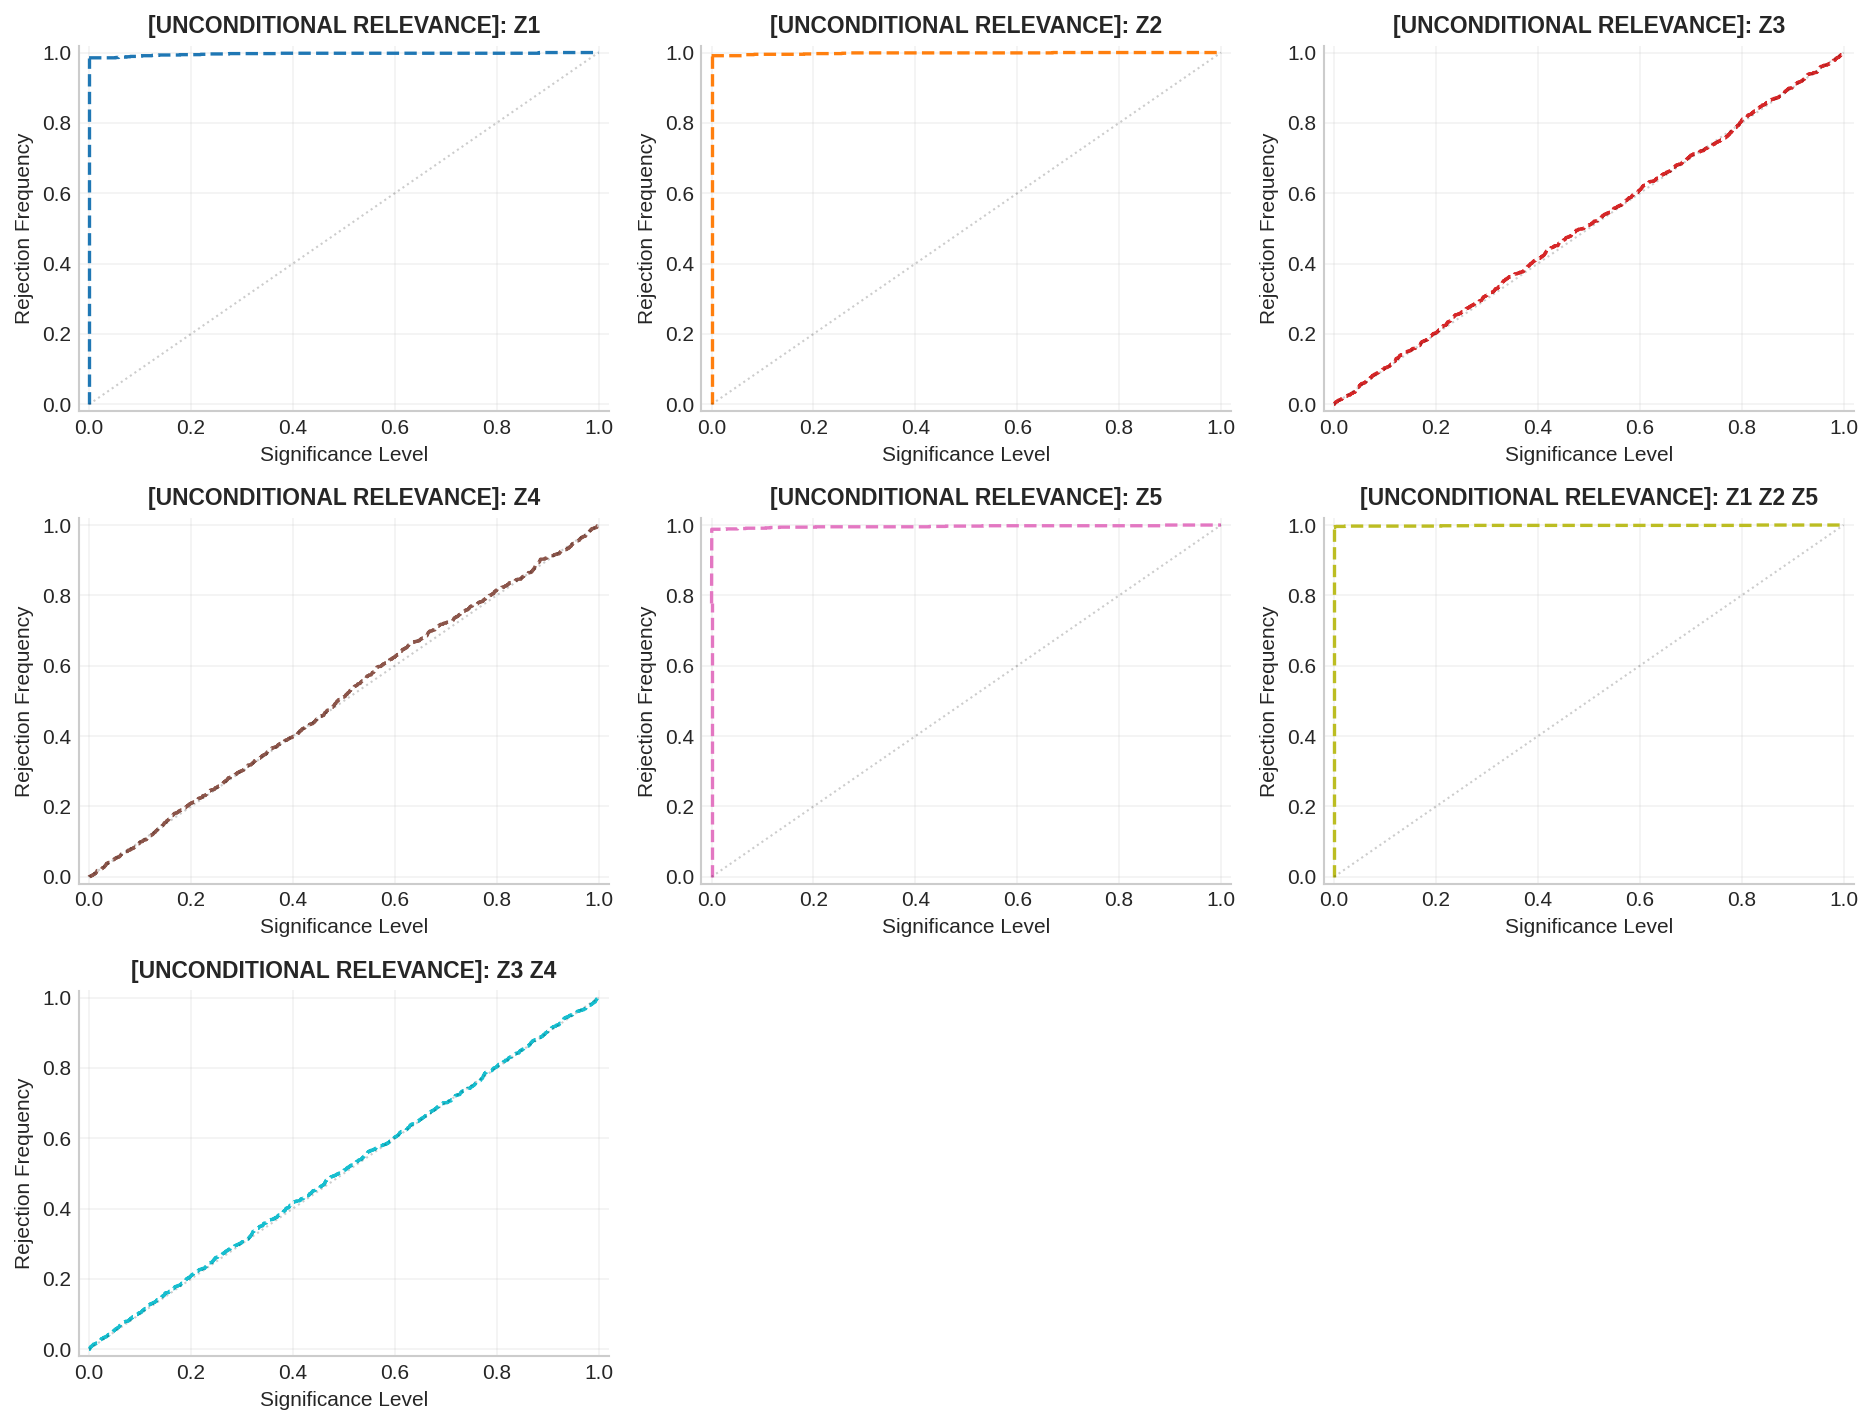

In [51]:
non_partial_monte_carlo.plot_rejection_curves(
    unconditional_results, 
    save_path="unconditional_results.png", 
    fill_vertical_zero_line=['Z1', 'Z2', 'Z5', 'Z1 Z2 Z5']
)

## <center> 2.1. Conditional Relevance [Done] <center>

In [23]:
# see test_impl: conditional_relevance

## <center> 2.2 Simulation and sanity check [Need to monte-carlo model] <center>

In [26]:
sets_of_f2_indices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [0, 1, 4],
    [2, 3],
]

conditional_results = non_partial_monte_carlo.monte_carlo_conditional_relevance_prodecure(
    T=200,
    beta=0.98, 
    gamma=1.5,
    sets_of_f2_indices=sets_of_f2_indices,
    B=1000,
    num_alphas=5000,
    n_jobs=-1,
)

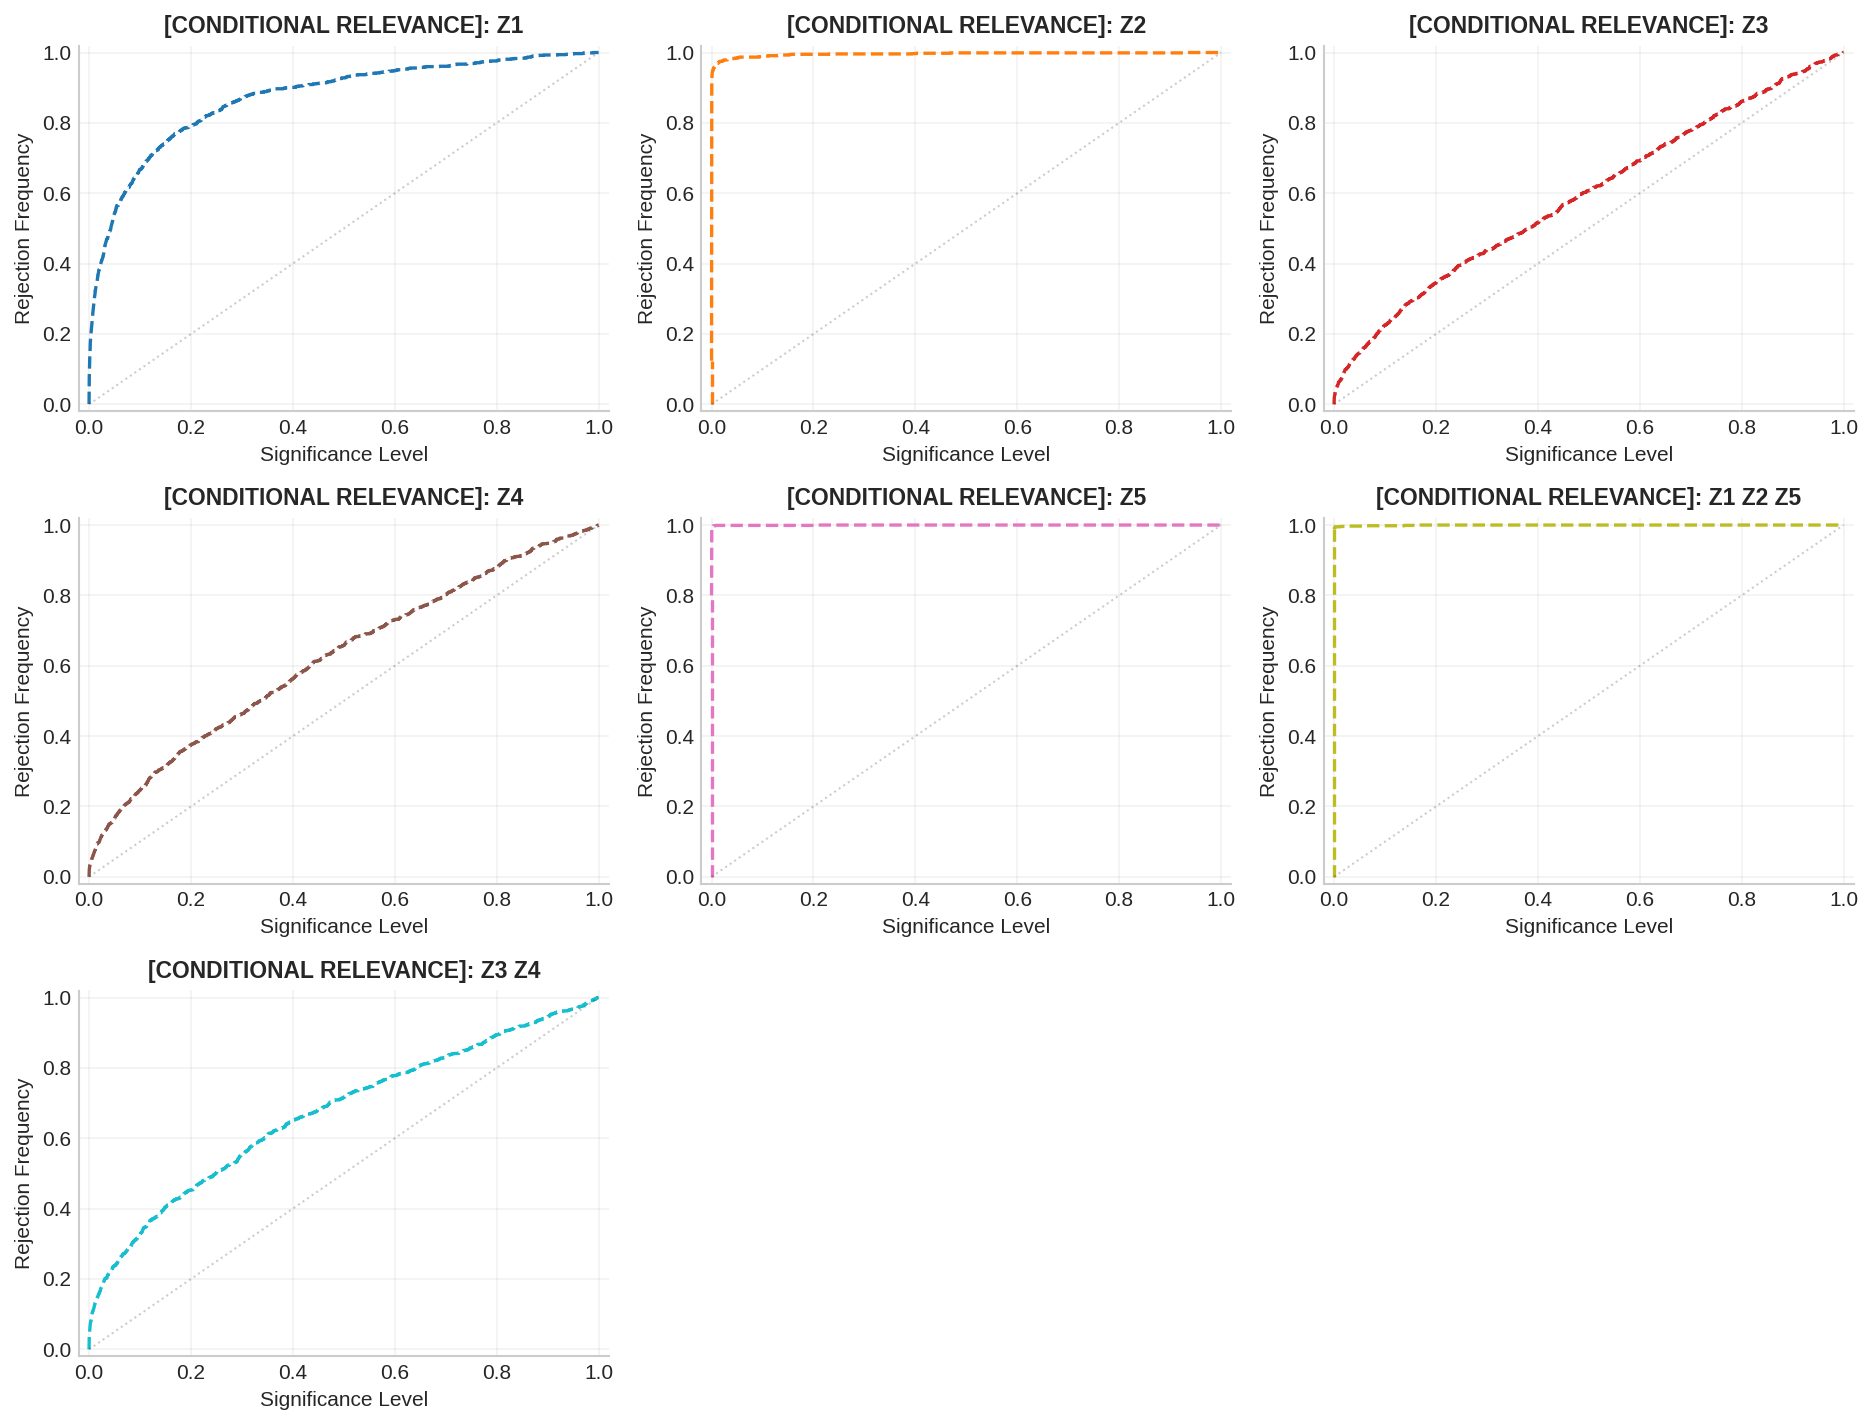

In [53]:
non_partial_monte_carlo.plot_rejection_curves(
    conditional_results, 
    save_path="conditional_results.png", 
    fill_vertical_zero_line=['Z1', 'Z2', 'Z5', 'Z1 Z2 Z5']
)

## <center> <center>

## <center> 3.1. Partial Relevance Test <center>

In [4]:
# see test_impl: partial_unconditional_relevance

## <center> 3.2 Simulation and sanity check [Need to monte-carlo model] <center>

In [ ]:
import pickle
with open("data/partial_data_for_testing_procedures/sim_000001.pkl", "rb") as f:
    data1 = pickle.load(f)

with open("data/partial_data_for_testing_procedures/sim_000002.pkl", "rb") as f:
    data2 = pickle.load(f)

In [858]:
def make_moment(name):
    def moment(theta, dp):
        beta, gamma = theta
        return (beta * dp['C_ratio'] ** (-gamma) * dp['R'] - 1) * dp[name]
    return moment

partial_unconditional_relevance(
    data=data1,
    moments=[make_moment(name) for name in ['CONST', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5']],
    f2_indexes=[3],
    a_indexes=[0],
    theta_init=np.array([0, 0])
)

(8515.951123116136, 0.0, array([0.98091091, 0.71264672]))

## <center> 4.1. Partial Conditional Relevance Test <center>

In [20]:
# see test_impl: partial_conditional_relevance

## <center> 4.2 Simulation and sanity check [Need to monte-carlo model] <center>